In [60]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm

## PEMA

In [61]:
pema_training_df = pd.read_csv("data/pema_training_data.csv")
pema_testing_df = pd.read_csv("data/pema_testing_data.csv")

In [62]:
pema_training_df.head()

,Unnamed: 0,datetime_utc,no2_wrk_aux,no_wrk_aux,o3_wrk_aux,rh,temp,true_o3,hour
0,0,2024-12-27 13:00:00+00:00,0.00727,0.07954,0.01004,58.35494,1.13462,22.490,13
1,1,2024-12-27 13:01:00+00:00,0.00705,0.07965,0.01076,56.66053,1.56385,22.923,13
2,2,2024-12-27 13:02:00+00:00,0.00622,0.08010,0.01014,53.99303,2.23571,22.529,13
3,3,2024-12-27 13:03:00+00:00,0.00649,0.07730,0.00981,53.92195,2.25231,23.365,13
4,4,2024-12-27 13:04:00+00:00,0.00609,0.07664,0.00942,53.85045,2.27500,22.543,13


In [63]:
pema_testing_df["datetime_utc"] = pd.to_datetime(pema_testing_df["datetime_utc"])
pema_testing_df["hour"] = pema_testing_df["datetime_utc"].dt.hour

pema_testing_df.head()

,Unnamed: 0,datetime_utc,no2_wrk_aux,no_wrk_aux,o3_wrk_aux,rh,temp,hour,true_o3
0,0,2024-12-17 08:00:00+00:00,-0.00042,0.02900,0.02580,81.23332,14.60615,8,45.070
1,1,2024-12-17 08:01:00+00:00,-0.00055,0.03017,0.02645,81.06122,14.62692,8,44.679
2,2,2024-12-17 08:02:00+00:00,-0.00049,0.02977,0.02618,81.06264,14.62857,8,44.679
3,3,2024-12-17 08:03:00+00:00,-0.00009,0.02890,0.02612,81.06138,14.63000,8,43.515
4,4,2024-12-17 08:04:00+00:00,-0.00044,0.02998,0.02639,81.05814,14.62615,8,44.687


Training R^2: 0.987


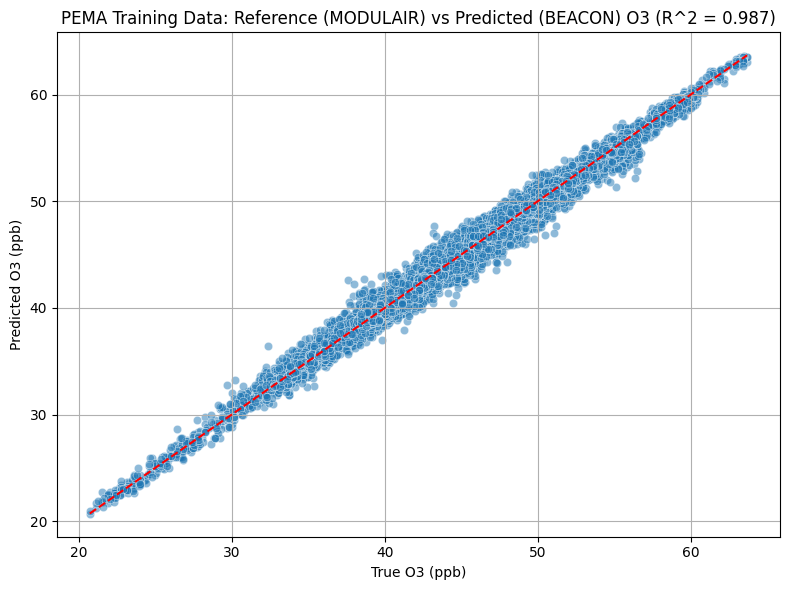

Testing R^2: 0.818


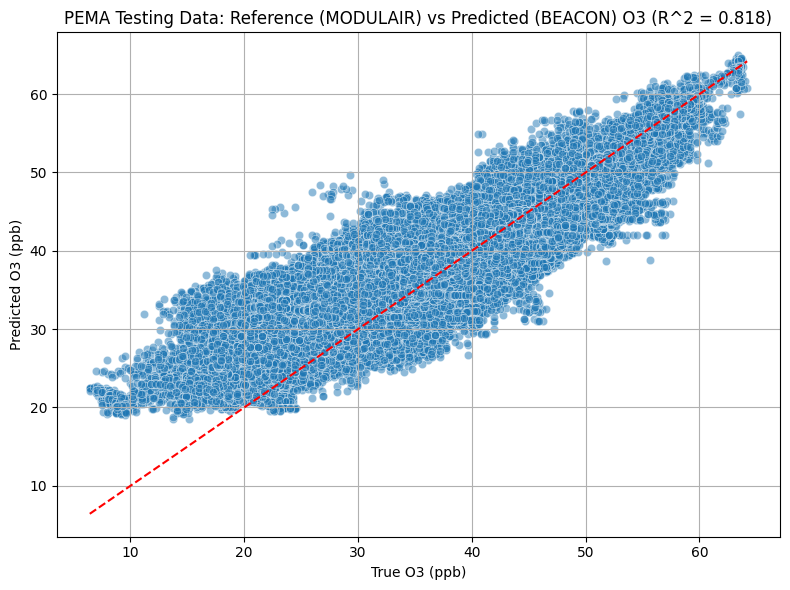

In [64]:
import xgboost as xgb
from sklearn.metrics import r2_score


features = ["no2_wrk_aux", "o3_wrk_aux", "no_wrk_aux", "rh", "hour", "temp"]
target = "true_o3"

X_train = pema_training_df[features]
y_train = pema_training_df[target]

model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)


r2_train = r2_score(y_train, y_train_pred)
print(f"Training R^2: {r2_train:.3f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "r--")
plt.xlabel("True O3 (ppb)")
plt.ylabel("Predicted O3 (ppb)")
plt.title(f"PEMA Training Data: Reference (MODULAIR) vs Predicted (BEACON) O3 (R^2 = {r2_train:.3f})")
plt.grid(True)
plt.tight_layout()
plt.show()

X_test = pema_testing_df[features]
y_test = pema_testing_df[target]

y_test_pred = model.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
print(f"Testing R^2: {r2_test:.3f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("True O3 (ppb)")
plt.ylabel("Predicted O3 (ppb)")
plt.title(f"PEMA Testing Data: Reference (MODULAIR) vs Predicted (BEACON) O3 (R^2 = {r2_test:.3f})")
plt.grid(True)
plt.tight_layout()
plt.show()


In [65]:
pema_testing_df["predicted_o3"] = y_test_pred

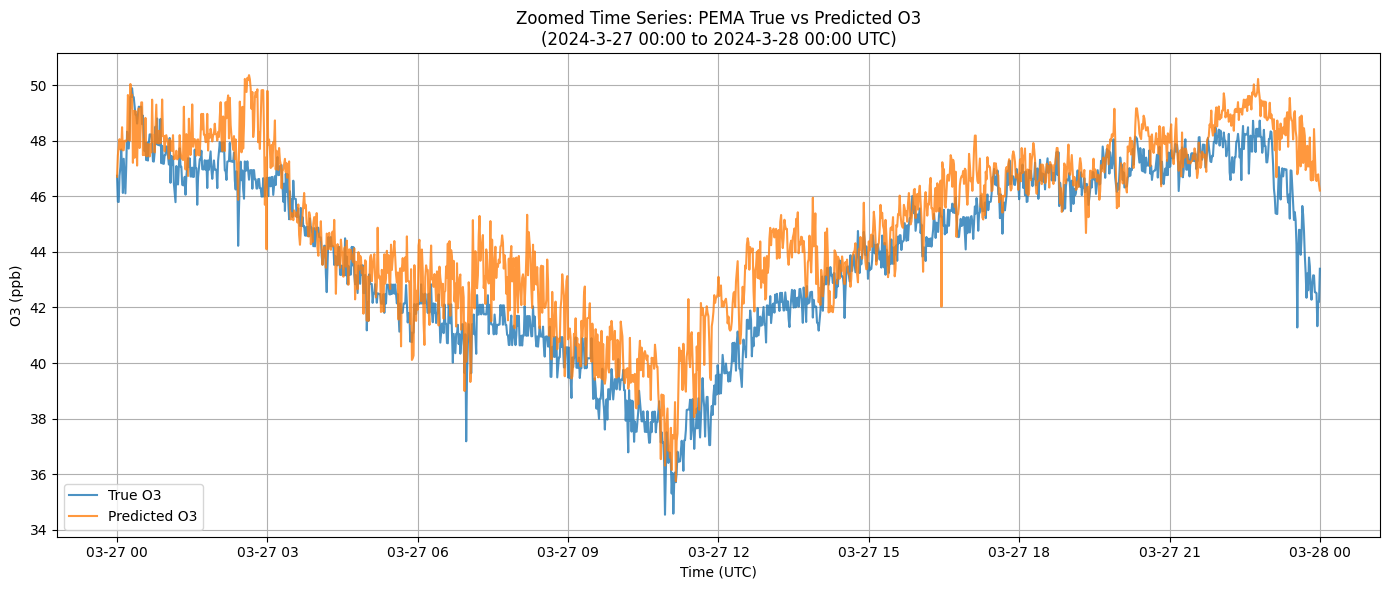

In [66]:
start_time = pd.to_datetime("2025-03-27 00:00:00+00:00")
end_time = pd.to_datetime("2025-03-28 00:00:00+00:00")

df_zoom = pema_testing_df[(pema_testing_df["datetime_utc"] >= start_time) & (pema_testing_df["datetime_utc"] <= end_time)]

plt.figure(figsize=(14, 6))
plt.plot(df_zoom["datetime_utc"], df_zoom["true_o3"], label="True O3", alpha=0.8)
plt.plot(df_zoom["datetime_utc"], df_zoom["predicted_o3"], label="Predicted O3", alpha=0.8)
plt.xlabel("Time (UTC)")
plt.ylabel("O3 (ppb)")
plt.title("Zoomed Time Series: PEMA True vs Predicted O3\n(2024-3-27 00:00 to 2024-3-28 00:00 UTC)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


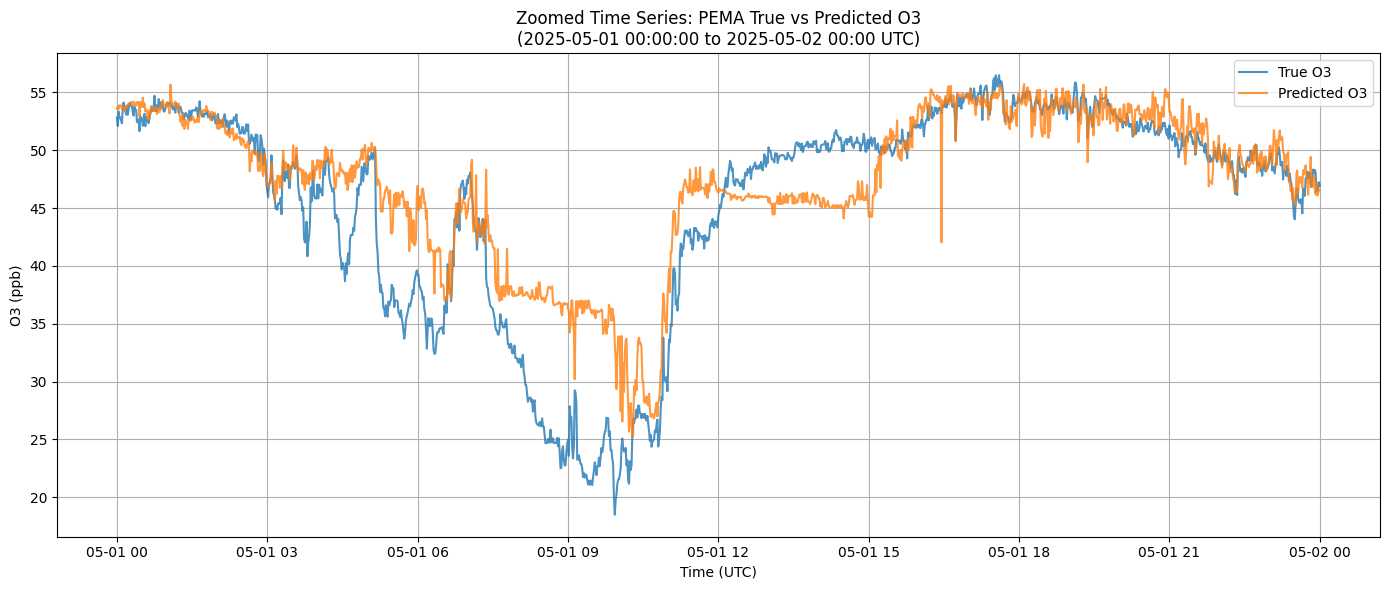

In [67]:
start_time = pd.to_datetime("2025-05-01 00:00:00+00:00")
end_time = pd.to_datetime("2025-05-02 00:00:00+00:00")

df_zoom = pema_testing_df[(pema_testing_df["datetime_utc"] >= start_time) & (pema_testing_df["datetime_utc"] <= end_time)]

plt.figure(figsize=(14, 6))
plt.plot(df_zoom["datetime_utc"], df_zoom["true_o3"], label="True O3", alpha=0.8)
plt.plot(df_zoom["datetime_utc"], df_zoom["predicted_o3"], label="Predicted O3", alpha=0.8)
plt.xlabel("Time (UTC)")
plt.ylabel("O3 (ppb)")
plt.title("Zoomed Time Series: PEMA True vs Predicted O3\n(2025-05-01 00:00:00 to 2025-05-02 00:00 UTC)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## PHA

In [68]:
pha_training_df = pd.read_csv("data/pha_training_data.csv")
pha_testing_df = pd.read_csv("data/pha_testing_data.csv")

In [69]:
pha_training_df.head()

,Unnamed: 0,datetime_utc,no2_wrk_aux,no_wrk_aux,o3_wrk_aux,rh,temp,true_o3,hour
0,0,2024-12-27 13:00:00+00:00,0.00670,0.03062,0.01748,58.20675,-0.39357,21.318,13
1,1,2024-12-27 13:01:00+00:00,0.00672,0.03256,0.01747,58.13728,-0.38214,21.745,13
2,2,2024-12-27 13:02:00+00:00,0.00730,0.03362,0.01744,55.97990,0.17250,20.921,13
3,3,2024-12-27 13:03:00+00:00,0.00751,0.03480,0.01742,55.22231,0.36929,21.800,13
4,4,2024-12-27 13:04:00+00:00,0.00710,0.03479,0.01738,55.19517,0.38786,21.804,13


In [70]:
pha_testing_df["datetime_utc"] = pd.to_datetime(pha_testing_df["datetime_utc"])
pha_testing_df["hour"] = pha_testing_df["datetime_utc"].dt.hour

pha_testing_df.head()

,Unnamed: 0,datetime_utc,no2_wrk_aux,no_wrk_aux,o3_wrk_aux,rh,temp,hour,true_o3
0,0,2024-12-17 08:00:00+00:00,0.00635,-0.00411,0.03130,100.0,13.71929,8,31.915
1,1,2024-12-17 08:01:00+00:00,0.00649,-0.00060,0.03107,100.0,13.71923,8,31.915
2,2,2024-12-17 08:02:00+00:00,0.00730,-0.00210,0.03121,100.0,13.72214,8,31.901
3,3,2024-12-17 08:03:00+00:00,0.00676,-0.00403,0.03191,100.0,13.71571,8,31.103
4,4,2024-12-17 08:04:00+00:00,0.00616,-0.00583,0.03206,100.0,13.72000,8,31.118


Training R^2: 0.985


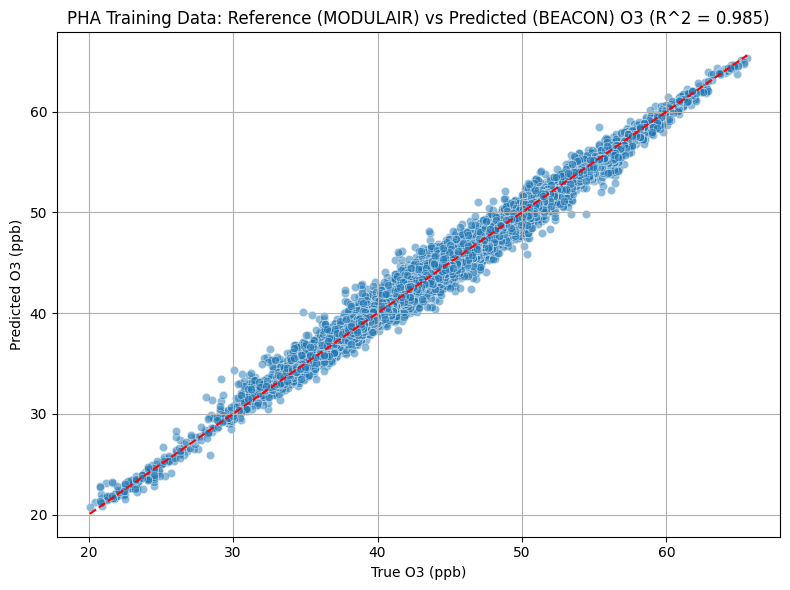

Testing R^2: 0.648


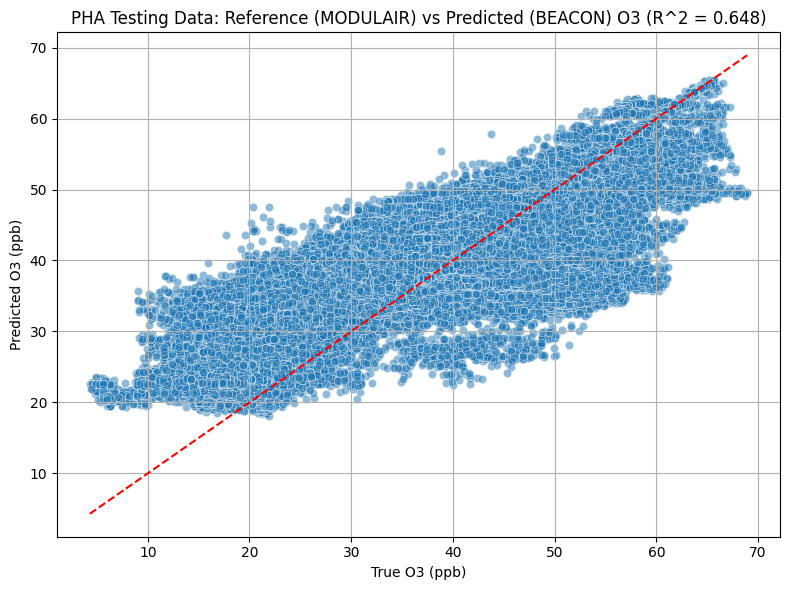

In [71]:
X_train = pha_training_df[features]
y_train = pha_training_df[target]

model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)


r2_train = r2_score(y_train, y_train_pred)
print(f"Training R^2: {r2_train:.3f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "r--")
plt.xlabel("True O3 (ppb)")
plt.ylabel("Predicted O3 (ppb)")
plt.title(f"PHA Training Data: Reference (MODULAIR) vs Predicted (BEACON) O3 (R^2 = {r2_train:.3f})")
plt.grid(True)
plt.tight_layout()
plt.show()

X_test = pha_testing_df[features]
y_test = pha_testing_df[target]

y_test_pred = model.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
print(f"Testing R^2: {r2_test:.3f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("True O3 (ppb)")
plt.ylabel("Predicted O3 (ppb)")
plt.title(f"PHA Testing Data: Reference (MODULAIR) vs Predicted (BEACON) O3 (R^2 = {r2_test:.3f})")
plt.grid(True)
plt.tight_layout()
plt.show()


In [72]:
pha_testing_df["predicted_o3"] = y_test_pred

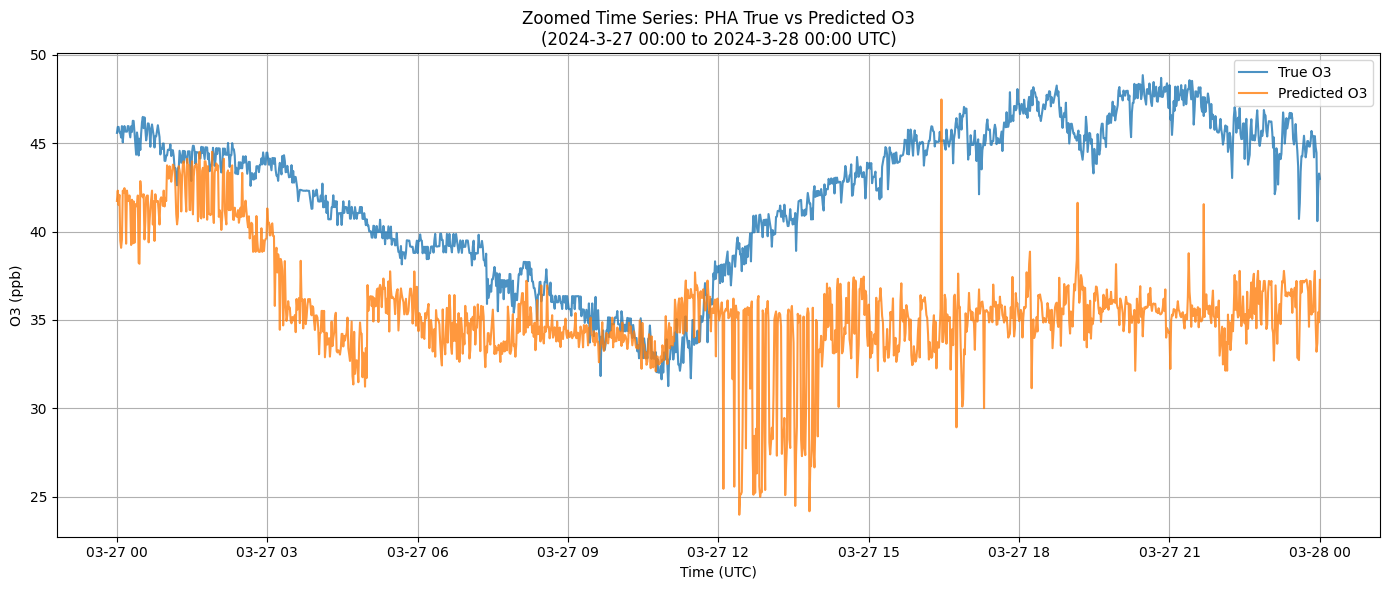

In [73]:
start_time = pd.to_datetime("2025-03-27 00:00:00+00:00")
end_time = pd.to_datetime("2025-03-28 00:00:00+00:00")

df_zoom = pha_testing_df[(pha_testing_df["datetime_utc"] >= start_time) & (pha_testing_df["datetime_utc"] <= end_time)]

plt.figure(figsize=(14, 6))
plt.plot(df_zoom["datetime_utc"], df_zoom["true_o3"], label="True O3", alpha=0.8)
plt.plot(df_zoom["datetime_utc"], df_zoom["predicted_o3"], label="Predicted O3", alpha=0.8)
plt.xlabel("Time (UTC)")
plt.ylabel("O3 (ppb)")
plt.title("Zoomed Time Series: PHA True vs Predicted O3\n(2024-3-27 00:00 to 2024-3-28 00:00 UTC)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


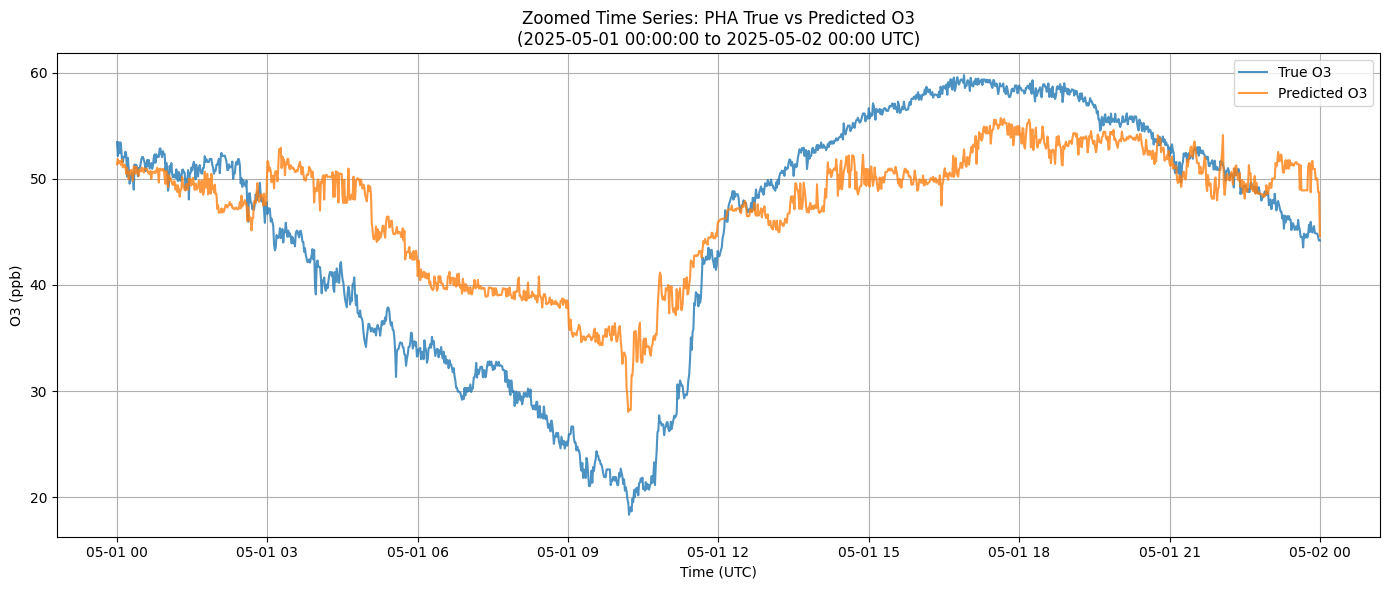

In [74]:
start_time = pd.to_datetime("2025-05-01 00:00:00+00:00")
end_time = pd.to_datetime("2025-05-02 00:00:00+00:00")

df_zoom = pha_testing_df[(pha_testing_df["datetime_utc"] >= start_time) & (pha_testing_df["datetime_utc"] <= end_time)]

plt.figure(figsize=(14, 6))
plt.plot(df_zoom["datetime_utc"], df_zoom["true_o3"], label="True O3", alpha=0.8)
plt.plot(df_zoom["datetime_utc"], df_zoom["predicted_o3"], label="Predicted O3", alpha=0.8)
plt.xlabel("Time (UTC)")
plt.ylabel("O3 (ppb)")
plt.title("Zoomed Time Series: PHA True vs Predicted O3\n(2025-05-01 00:00:00 to 2025-05-02 00:00 UTC)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
